In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Search for best hyperparameters using GridSearchCV and RandomForestRegressor

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [20]:
model = RandomForestRegressor()
params_grid  = [{'n_estimators' : [10,50,100] , 'max_features': [2,4,8]}]

In [21]:
grid_search = GridSearchCV(model, params_grid, cv= 5)
grid_search.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [22]:
## display scores 
results = grid_search.cv_results_
for score,param in zip(results['mean_test_score'], results['params']):
      print(score,param)

0.4132251276845148 {'max_features': 2, 'n_estimators': 10}
0.6244617993110743 {'max_features': 2, 'n_estimators': 50}
0.6335801968536603 {'max_features': 2, 'n_estimators': 100}
0.5361577445946724 {'max_features': 4, 'n_estimators': 10}
0.5490426442772667 {'max_features': 4, 'n_estimators': 50}
0.6140375422904849 {'max_features': 4, 'n_estimators': 100}
0.5993720013998638 {'max_features': 8, 'n_estimators': 10}
0.5570620169028742 {'max_features': 8, 'n_estimators': 50}
0.5625271850258292 {'max_features': 8, 'n_estimators': 100}


In [23]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 100}

In [24]:
grid_search.best_score_

0.6335801968536603

In [25]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Build model with best estimator

In [26]:
model = grid_search.best_estimator_

In [27]:
y_test = y[150:]
X_test = X[150:]
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)

In [29]:
np.sqrt(mse)

654.248995284525

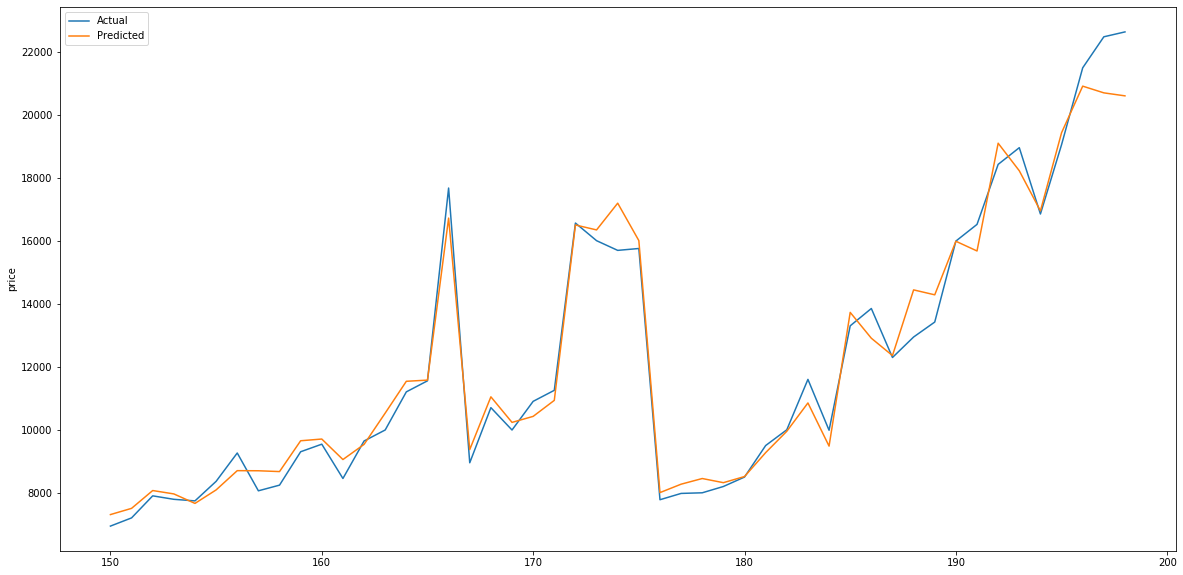

In [30]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")